In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import dataimport

In [2]:
# hdf5_filename = 'dataimport_ML_df'
# directory = '../ramandecompy/tests/test_files/'
# # open hdf5 file as read/write
# dataimport.data_import(hdf5_filename,directory)
# dataprep.view_hdf5(hdf5_filename+'.hdf5')

In [3]:
hdf5_filename = 'dataimport_ML_df-Copy1.hdf5'
dataprep.view_hdf5('dataimport_ML_df-Copy1.hdf5')

**** dataimport_ML_df-Copy1.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|   

|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    6s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    7s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    8s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber


In [4]:

def keyfinder(hdf5_filename):
    seconds = []
    hdf5 = h5py.File(hdf5_filename, 'r')
    for _, layer_1 in enumerate(list(hdf5.keys())):
        if isinstance(hdf5[layer_1], h5py.Group):
    #         print('\033[1m{}\033[0m'.format(layer_1))
            for _, layer_2 in enumerate(list(hdf5[layer_1].keys())):
                if isinstance(hdf5['{}/{}'.format(layer_1, layer_2)], h5py.Group):
    #                 print('|    \033[1m{}\033[0m'.format(layer_2))
                    seconds.append('{}/{}'.format(layer_1, layer_2))
                    for _, layer_3 in enumerate(list(hdf5['{}/{}'.format(layer_1, layer_2)])):
                        if isinstance(hdf5['{}/{}/{}'.format(layer_1, layer_2, layer_3)],
                                      h5py.Group):
    #                         print('|    |    \033[1m{}\033[0m/...'.format(layer_3))
                            pass
                        else:
                            pass
    #                         print('|    |    {}'.format(layer_3))
                else:
    #                 print('|    {}'.format(layer_2))
                    seconds.append('{}/{}'.format(layer_1, layer_2))
        else:
            pass
    #         print('{}'.format(layer_1))
    hdf5.close()
    return seconds
# test_example = h5py.File(hdf5_filename+'.hdf5', 'r+')
# dan = list(test_example.keys())
# print(dan)
key_list = keyfinder('dataimport_ML_df-Copy1.hdf5')
key_list

['300C/25s',
 '300C/35s',
 '300C/45s',
 '300C/55s',
 '300C/65s',
 '320C/25s',
 '320C/30s',
 '320C/40s',
 '320C/50s',
 '320C/60s',
 '340C/20s',
 '340C/30s',
 '340C/40s',
 '340C/50s',
 '340C/60s',
 '360C/20s',
 '360C/30s',
 '360C/40s',
 '360C/50s',
 '360C/60s',
 '380C/15s',
 '380C/25s',
 '380C/35s',
 '380C/45s',
 '380C/55s',
 '390C/10s',
 '390C/15s',
 '390C/20s',
 '390C/25s',
 '390C/30s',
 '400C/10s',
 '400C/125s',
 '400C/15s',
 '400C/5s',
 '400C/75s',
 '410C/10s',
 '410C/125s',
 '410C/15s',
 '410C/5s',
 '410C/75s',
 '420C/10s',
 '420C/5s',
 '420C/625s',
 '420C/75s',
 '420C/875s',
 '430C/4s',
 '430C/5s',
 '430C/6s',
 '430C/7s',
 '430C/8s']

In [5]:
dataprep.new_hdf5('dataimport_ML_calibration_test')

In [6]:

dataprep.add_calibration('dataimport_ML_calibration_test.hdf5',
                          '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx',
                          label='Hydrogen')
dataprep.add_calibration('dataimport_ML_calibration_test.hdf5',
                          '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx',
                          label='CarbonMonoxide')
dataprep.add_calibration('dataimport_ML_calibration_test.hdf5','../ramandecompy/tests/test_files/CO2_100wt%.csv',label='CO2')
dataprep.add_calibration('dataimport_ML_calibration_test.hdf5','../ramandecompy/tests/test_files/water.xlsx',label='H2O')
dataprep.add_calibration('dataimport_ML_calibration_test.hdf5','../ramandecompy/tests/test_files/sapphire.xlsx',label='sapphire')

Data from ../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to dataimport_ML_calibration_test.hdf5.
Data from ../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to dataimport_ML_calibration_test.hdf5.
Data from ../ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model. Results saved to dataimport_ML_calibration_test.hdf5.
Data from ../ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model. Results saved to dataimport_ML_calibration_test.hdf5.
Data from ../ramandecompy/tests/test_files/sapphire.xlsx fit with compound pseudo-Voigt model. Results saved to dataimport_ML_calibration_test.hdf5.


In [7]:
hdf5_calfilename = 'dataimport_ML_calibration_test.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'dataimport_ML_df-Copy1.hdf5'

frames = []
for i,key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['Unassigned'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Hydrogen', 'sapphire'], ['Unassigned'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['H2O'], ['Unassigned'], ['CarbonMonoxide'], ['Unassigned'], ['Unassigned'], ['H2O']]
(2.666322015842937e-06, 9.477841225773703, 314.77, 251.85262399390513, 18.955682451547407, 12.48172103404355, 251.85249801424473, "['Unassig

(0.9999999999999998, 42.860146296527944, 1711.5, 70693.44178881001, 85.72029259305589, 525.0197060470474, 69409.36892887966, "['Unassigned']")
(1.2612133559741778e-13, 4.314872020222211, 2137.9, 559.6082331557351, 8.629744040444422, 60.919169007780745, 559.7003043063684, "['CarbonMonoxide']")
(1.2639305746464657e-07, 2.862320726863765, 2328.9, 146.90741445169732, 5.72464145372753, 24.108111773655583, 146.94963980107016, "['Unassigned']")
(1.2212453270876722e-14, 21.312586031837316, 2940.6, 3750.9347915738026, 42.62517206367463, 82.66870965147127, 3750.9364202866177, "['Unassigned']")
(0.6870923336298637, 86.50685483074956, 3192.5, 63408.575031046435, 173.01370966149912, 268.04444393983397, 46190.465559872435, "['H2O']")
{'CO2': 0.0, 'CarbonMonoxide': 100.0, 'H2O': 50.0, 'Hydrogen': 25.0, 'sapphire': 100.0}
The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0.

(0.7083119772235671, 3.7457675970687534, 2137.9, 541.2014444054497, 7.491535194137507, 52.371496772551, 540.6946811698123, "['CarbonMonoxide']")
(0.271664726897354, 3.880808477322549, 2330.3, 247.28403749384512, 7.761616954645098, 27.309394924562504, 247.14894950856151, "['Unassigned']")
(4.996003610813204e-16, 21.467175610484645, 2940.6, 3544.3858437922613, 42.93435122096929, 77.5539421713101, 3544.387373759393, "['Unassigned']")
(0.6946182637952455, 84.43484444571385, 3186.9, 60694.37703202745, 168.8696888914277, 262.04791044690603, 45357.6794019031, "['H2O']")
{'CO2': 0.0, 'CarbonMonoxide': 100.0, 'H2O': 100.0, 'Hydrogen': 25.0, 'sapphire': 100.0}
The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
The peaks that we f

(0.0006331895867351944, 24.35066849333578, 1053.9, 2204.684338296961, 48.70133698667156, 42.51915974272393, 2204.6660805046495, "['Unassigned']")
(0.2706438387864273, 27.43762048900138, 1215.6, 12714.177541134582, 54.87524097800276, 198.67198635678085, 12668.326528320134, "['Unassigned']")
(0.9999999051304134, 25.48112861132692, 1274.8, 6721.600374829601, 50.96225722265384, 83.96613742938771, 6640.89134760746, "['CO2']")
(0.9999999066255159, 13.706814373369454, 1383.4, 13502.61219507197, 27.413628746738908, 313.5677645305955, 13419.194149543662, "['CO2']")
(0.9978739573807646, 7.400415857947883, 1400.1, 4637.72653889654, 14.800831715895766, 199.68162952823906, 4622.305358867102, "['Unassigned']")
(1.8915743527081474e-08, 51.022854131313586, 1649.3, 32565.065485550404, 102.04570826262717, 299.7954233915815, 32565.06295099529, "['H2O']")
(0.3095352222536326, 28.550732272059467, 1711.5, 24204.30346949133, 57.10146454411893, 358.479258212675, 24113.64339191161, "['Unassigned']")
(0.8377998

The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['Unassigned'], ['Hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Hydrogen', 'sapphire'], ['Unassigned'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['CO2'], ['CO2'], ['Unassigned'], ['H2O'], ['Unassigned'], ['CarbonMonoxide'], ['Unassigned'], ['Unassigned'], ['H2O']]
(0.3632025853595994, 1.137806462116549, 263.71, 36.209018332710

The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['Hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Hydrogen'], ['Unassigned'], ['sapphire'], ['Hydrogen'], ['Hydrogen'], ['Unassigned'], ['CO2'], ['CO2'], ['Unassigned'], ['Unassigned'], ['CarbonMonoxide'], ['Unassigned'], ['Unassigned'], ['Unassigned']]
(0.5870422481997825, 4.394361021199156, 354.52, 1965.3995088300305, 8.788722042398312, 170.33045

The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['Unassigned'], ['Hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Hydrogen'], ['Unassigned'], ['sapphire'], ['Hydrogen'], ['Hydrogen'], ['Unassigned'], ['CO2'], ['CO2'], ['H2O'], ['Unassigned'], ['CarbonMonoxide'], ['Unassigned'], ['Unassigned'], ['H2O']]
(0.0003094438339730776, 4.72848729186008, 305.91, 137.16083617947098, 9.4569745

(0.5179123648486419, 90.4133266742075, 3189.7, 54337.70667795137, 180.826653348415, 235.1695655060763, 40609.688732475006, "['H2O']")
{'CO2': 100.0, 'CarbonMonoxide': 100.0, 'H2O': 100.0, 'Hydrogen': 100.0, 'sapphire': 75.0}
The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['Hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Hydrogen', 'sapphire'], ['Unassigned'], ['sapphire'], ['Hydr

The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[['Hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Hydrogen'], ['Unassigned'], ['sapphire'], ['Hydrogen'], ['Hydrogen'], ['CO2'], ['CO2'], ['H2O'], ['CarbonMonoxide'], ['Unassigned'], ['H2O']]
(0.5742396229537694, 4.254127773038122, 354.52, 4595.982970569102, 8.508255546076244, 413.53284550738033, 4560.347296742287, "['Hydrogen']")
(0.6709753770635807, 3.8387418846275856, 378.71, 1104.43350479

The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['Hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Hydrogen'], ['Unassigned'], ['sapphire'], ['Hydrogen'], ['Hydrogen'], ['CO2'], ['CO2'], ['H2O'], ['Unassigned'], ['CarbonMonoxide'], ['Unassigned'], ['Unassigned'], ['H2O']]
(0.6124270298646814, 4.426868279912666, 354.52, 5456.8922984857645, 8.853736559825332, 464.7086074712526, 5409.964182456382, "['Hydrogen']")


The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[['Hydrogen'], ['sapphire'], ['Unassigned'], ['Hydrogen'], ['sapphire'], ['Hydrogen'], ['Hydrogen'], ['CO2'], ['CO2'], ['H2O'], ['CarbonMonoxide'], ['H2O']]
(0.6372543372842531, 4.443201786029512, 354.52, 8621.150619076145, 8.886403572059024, 724.1840342001499, 8543.731855179125, "['Hydrogen']")
(0.5838693279716911, 3.8271985863552302, 418.14, 7092.386924974954, 7.6543971727104605, 706.6365937953688, 7060.687297169615, "['sapphire']")
(3.885780586

The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['Unassigned'], ['Hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Hydrogen'], ['Unassigned'], ['sapphire'], ['Unassigned'], ['Hydrogen'], ['Hydrogen'], ['Unassigned'], ['CO2'], ['CO2'], ['H2O'], ['Unassigned'], ['CarbonMonoxide'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['H2O']]
(0.00027466826203

The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[['Hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Hydrogen'], ['sapphire'], ['Hydrogen'], ['Hydrogen'], ['CO2'], ['CO2'], ['H2O'], ['CarbonMonoxide'], ['Unassigned'], ['H2O']]
(0.559993979169416, 4.345416883219625, 354.52, 3725.044673352133, 8.69083376643925, 329.976134139706, 3696.277670567694, "['Hydrogen']")
(0.07956541689178792, 3.6226470451209147, 378.71, 500.8271900790506, 7.2452940902418295, 63.27264

The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[['Hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Hydrogen'], ['sapphire'], ['Hydrogen'], ['Hydrogen'], ['CO2'], ['CO2'], ['H2O'], ['CarbonMonoxide'], ['H2O']]
(0.44822173296495144, 4.2784829190936025, 354.52, 6182.749297679064, 8.556965838187205, 580.7110246862946, 6145.077595093544, "['Hydrogen']")
(0.951413339982587, 3.671459424686755, 378.71, 809.3558455153127, 7.34291884937351, 71.79160078838349, 802.0846853866801, "

The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[['Hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Hydrogen'], ['sapphire'], ['Hydrogen'], ['Hydrogen'], ['CO2'], ['CO2'], ['H2O'], ['CarbonMonoxide'], ['H2O']]
(0.46352795646265743, 4.31923428223859, 354.52, 8048.053792746642, 8.63846856447718, 744.4585375215115, 7996.875052636693, "['Hydrogen']")
(0.9999999191265562, 4.521051411150239, 378.71, 870.925778464654, 9.042102822300478, 61.31854537162243, 860.7418988621648, "['

The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[['Hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Hydrogen'], ['sapphire'], ['Hydrogen'], ['Hydrogen'], ['CO2'], ['CO2'], ['H2O'], ['CarbonMonoxide'], ['H2O']]
(0.4791805544888818, 4.3506025340651435, 354.52, 7765.976637903766, 8.701205068130287, 708.9560139117932, 7714.566340982205, "['Hydrogen']")
(0.9356705844142563, 3.6942190837046383, 378.71, 788.001140785068, 7.3884381674092765, 69.97519842092542, 780.9933270004724,

In [8]:
frames

[             0        1       2        3        4        5        6  \
 0  2.66632e-06  9.47784  314.77  251.853  18.9557  12.4817  251.852   
 0     0.506813   4.0129  378.71  1034.01   8.0258   101.26  1028.59   
 0     0.636782  3.84759  418.14  7306.16  7.69519  708.864  7270.35   
 0  2.55231e-05  2.69962  448.67  193.734  5.39924  33.7084  193.741   
 0     0.188666  4.21062  578.11  1090.47  8.42124   114.25  1089.49   
 0  1.38778e-15  20.4979  711.51  6837.15  40.9957  156.677  6837.15   
 0  6.88713e-07  7.19462  751.21  3533.44  14.3892  230.689  3533.44   
 0            0  18.0052  1055.9  1438.24  36.0103  37.5207  1438.24   
 0     0.841161  29.1589  1217.6  20781.3  58.3177  243.997  20534.1   
 0            1  15.8466  1400.1  15275.1  31.6932  306.831  15166.6   
 0  1.05175e-05  47.9173  1649.3  35138.2  95.8346  344.448  35138.2   
 0     0.179058   26.217  1714.9  25828.1   52.434  436.042  25776.7   
 0            1  3.77176  2137.9  285.944  7.54351  24.1317  285

In [9]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=key_list, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [10]:
result

0        1       2        3        4        5        6  \
300C/25s 0  2.66632e-06  9.47784  314.77  251.853  18.9557  12.4817  251.852   
         0     0.506813   4.0129  378.71  1034.01   8.0258   101.26  1028.59   
         0     0.636782  3.84759  418.14  7306.16  7.69519  708.864  7270.35   
         0  2.55231e-05  2.69962  448.67  193.734  5.39924  33.7084  193.741   
         0     0.188666  4.21062  578.11  1090.47  8.42124   114.25  1089.49   
         0  1.38778e-15  20.4979  711.51  6837.15  40.9957  156.677  6837.15   
         0  6.88713e-07  7.19462  751.21  3533.44  14.3892  230.689  3533.44   
         0            0  18.0052  1055.9  1438.24  36.0103  37.5207  1438.24   
         0     0.841161  29.1589  1217.6  20781.3  58.3177  243.997  20534.1   
         0            1  15.8466  1400.1  15275.1  31.6932  306.831  15166.6   
         0  1.05175e-05  47.9173  1649.3  35138.2  95.8346  344.448  35138.2   
         0     0.179058   26.217  1714.9  25828.1   52.434  436.042  25776.7   
         0            1  3.77176  2137.9  285.944  7.54351  24.1317  285.521   
         0     0.489606  3.60812  2328.9  255.955  7.21624  28.0624  255.753   
         0  1.60982e-15  21.9786  2948.2  3553.09  43.9572  75.9353  3553.09   
         0     0.553011  79.8096  3185.1  53203.1  159.619  257.309  41554.6   
300C/35s 0     0.493198  3.84136  378.71   985.18  7.68271  101.316   980.38   
         0     0.642997  3.81059  418.14  7232.34  7.62118   706.73  7196.91   
         0  1.07692e-14  2.61594  450.84  150.018  5.23189  26.9372  150.027   
         0     0.490083  4.12695  578.11  1229.31   8.2539  117.814  1226.57   
         0     0.966028  4.26157  614.36    205.6  8.52315  15.6051  204.764   
         0  1.11022e-15  20.5743  711.51  7441.88  41.1487    169.9  7441.88   
         0  5.93652e-09  7.11561  751.21  3457.79  14.2312  228.257   3457.8   
         0            0  18.2118  1055.9  1501.97  36.4236  38.7388  1501.97   
         0     0.799162  29.0338  1217.6  21598.4  58.0676  259.413  21355.3   
         0            1  15.7745  1400.1  16283.5  31.5491   328.58  16168.3   
         0   4.7038e-08  52.5427  1651.1  37279.7  105.085  333.271  37279.7   
         0     0.177272  26.9016  1713.2    26193  53.8033  431.212  26140.1   
         0     0.982646  4.00883  2137.9  532.343  8.01767  42.6181  531.501   
         0  2.80814e-11  3.97073  2330.3  209.439  7.94147  24.7756  209.423   
...                 ...      ...     ...      ...      ...      ...      ...   
430C/6s  0            1  7.69256  1385.3  23660.9  15.3851  979.063    23579   
         0  1.11022e-15  50.4553  1638.9  24675.3  100.911  229.717  24675.3   
         0     0.738487  4.16778  2140.9  1014.36  8.33557  87.1077  1012.98   
         0     0.520028  93.2303  3187.9  51105.6  186.461  214.322  38134.3   
430C/7s  0     0.541635  4.39474  354.52   7253.4  8.78947  639.906  7198.61   
         0     0.292955  4.04618  378.71  570.694  8.09236  59.9954  568.957   
         0     0.619249  3.88885  418.14  7308.87   7.7777  706.593  7273.64   
         0  0.000684137  2.73452  448.67   234.62  5.46903  40.2928  234.626   
         0      0.63861  4.54011  586.66  20832.2  9.08021  1711.63    20768   
         0  4.31266e-13  7.67625  751.21  4139.49  15.3525    253.3  4139.49   
         0     0.526453  3.84262  813.41  3004.72  7.68524  304.965  3000.67   
         0     0.965685  3.62261  1034.1   2844.6  7.24521  254.028  2838.81   
         0            1  19.8439  1284.2  16227.4  39.6878  260.298  16076.3   
         0     0.995222  7.75562  1385.3  22412.3  15.5112  921.948  22334.5   
         0    0.0305331  48.4932  1640.6  22094.1  96.9864  211.904  22080.2   
         0      0.88652  4.04306  2140.9  1008.46  8.08611  83.6815  1006.87   
         0     0.511043  90.3349  3187.9  45211.9   180.67  196.364  34067.6   
430C/8s  0     0.462596  4.42038  354.52  7438.08  8.84075   672.53  7389.79   
         0     0.85542

In [11]:
dat = pd.DataFrame()

In [12]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
known_compound_list = ["['Hydrogen']", "['Hydrogen', 'sapphire']", "['sapphire']", "['Unassigned']", "['CO2']", "['H2O']", "['CarbonMonoxide']"]
#convert the categorical columns into numeric
encoded_value = le.fit_transform(known_compound_list)
print(encoded_value)

# df.apply(LabelEncoder().fit_transform)
# EDIT2:

# In scikit-learn 0.20, the recommended way is

# OneHotEncoder().fit_transform(df)
# as the OneHotEncoder now supports string input. Applying OneHotEncoder only to certain columns is possible with the ColumnTransformer.

# EDIT:

# Since this answer is over a year ago, and generated many upvotes (including a bounty), I should probably extend this further.

# For inverse_transform and transform, you have to do a little bit of hack.

# from collections import defaultdict
# d = defaultdict(LabelEncoder)
# With this, you now retain all columns LabelEncoder as dictionary.

# # Encoding the variable
# fit = df.apply(lambda x: d[x.name].fit_transform(x))

# # Inverse the encoded
# fit.apply(lambda x: d[x.name].inverse_transform(x))

# # Using the dictionary to label future data
# df.apply(lambda x: d[x.name].transform(x))


[4 3 6 5 0 2 1]


In [13]:
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
# dat['center']= result[:][2]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labelencoded']=le.fit_transform(result[:][7])
dat['labels']= result[:][7]
dat['center']= result[:][2]

In [14]:
dat

fraction    sigma amplitude     fwhm   height      auc  \
300C/25s 0  2.66632e-06  9.47784   251.853  18.9557  12.4817  251.852   
         0     0.506813   4.0129   1034.01   8.0258   101.26  1028.59   
         0     0.636782  3.84759   7306.16  7.69519  708.864  7270.35   
         0  2.55231e-05  2.69962   193.734  5.39924  33.7084  193.741   
         0     0.188666  4.21062   1090.47  8.42124   114.25  1089.49   
         0  1.38778e-15  20.4979   6837.15  40.9957  156.677  6837.15   
         0  6.88713e-07  7.19462   3533.44  14.3892  230.689  3533.44   
         0            0  18.0052   1438.24  36.0103  37.5207  1438.24   
         0     0.841161  29.1589   20781.3  58.3177  243.997  20534.1   
         0            1  15.8466   15275.1  31.6932  306.831  15166.6   
         0  1.05175e-05  47.9173   35138.2  95.8346  344.448  35138.2   
         0     0.179058   26.217   25828.1   52.434  436.042  25776.7   
         0            1  3.77176   285.944  7.54351  24.1317  285.521   
         0     0.489606  3.60812   255.955  7.21624  28.0624  255.753   
         0  1.60982e-15  21.9786   3553.09  43.9572  75.9353  3553.09   
         0     0.553011  79.8096   53203.1  159.619  257.309  41554.6   
300C/35s 0     0.493198  3.84136    985.18  7.68271  101.316   980.38   
         0     0.642997  3.81059   7232.34  7.62118   706.73  7196.91   
         0  1.07692e-14  2.61594   150.018  5.23189  26.9372  150.027   
         0     0.490083  4.12695   1229.31   8.2539  117.814  1226.57   
         0     0.966028  4.26157     205.6  8.52315  15.6051  204.764   
         0  1.11022e-15  20.5743   7441.88  41.1487    169.9  7441.88   
         0  5.93652e-09  7.11561   3457.79  14.2312  228.257   3457.8   
         0            0  18.2118   1501.97  36.4236  38.7388  1501.97   
         0     0.799162  29.0338   21598.4  58.0676  259.413  21355.3   
         0            1  15.7745   16283.5  31.5491   328.58  16168.3   
         0   4.7038e-08  52.5427   37279.7  105.085  333.271  37279.7   
         0     0.177272  26.9016     26193  53.8033  431.212  26140.1   
         0     0.982646  4.00883   532.343  8.01767  42.6181  531.501   
         0  2.80814e-11  3.97073   209.439  7.94147  24.7756  209.423   
...                 ...      ...       ...      ...      ...      ...   
430C/6s  0            1  7.69256   23660.9  15.3851  979.063    23579   
         0  1.11022e-15  50.4553   24675.3  100.911  229.717  24675.3   
         0     0.738487  4.16778   1014.36  8.33557  87.1077  1012.98   
         0     0.520028  93.2303   51105.6  186.461  214.322  38134.3   
430C/7s  0     0.541635  4.39474    7253.4  8.78947  639.906  7198.61   
         0     0.292955  4.04618   570.694  8.09236  59.9954  568.957   
         0     0.619249  3.88885   7308.87   7.7777  706.593  7273.64   
         0  0.000684137  2.73452    234.62  5.46903  40.2928  234.626   
         0      0.63861  4.54011   20832.2  9.08021  1711.63    20768   
         0  4.31266e-13  7.67625   4139.49  15.3525    253.3  4139.49   
         0     0.526453  3.84262   3004.72  7.68524  304.965  3000.67   
         0     0.965685  3.62261    2844.6  7.24521  254.028  2838.81   
         0            1  19.8439   16227.4  39.6878  260.298  16076.3   
         0     0.995222  7.75562   22412.3  15.5112  921.948  22334.5   
         0    0.0305331  48.4932   22094.1  96.9864  211.904  22080.2   
         0      0.88652  4.04306   1008.46  8.08611  83.6815  1006.87   
         0     0.511043  90.3349   45211.9   180.67  196.364  34067.6   
430C/8s  0     0.462596  4.42038   7438.08  8.84075   672.53  7389.79   
         0     0.855428  3.64003   677.076  7.28006    63.28  671.659   
         0     0.550579    3.868   7051.84    7.736  704.375  7021.79   
         0  2.22045e-16  2.70972   227.851  5.41944   39.497  227.858   
         0     0.642756  4.52327   22176.1  9.04653  1825.75  22107.6   
         0  1.86242e-07  7.87199   4241.73   15.744  253.103  4241.74   


In [15]:
datlabel = pd.DataFrame()

In [16]:
datlabel['labels']= result[:][7]

In [17]:
datlabel

labels
300C/25s 0            ['Unassigned']
         0              ['sapphire']
         0              ['sapphire']
         0            ['Unassigned']
         0  ['Hydrogen', 'sapphire']
         0            ['Unassigned']
         0              ['sapphire']
         0            ['Unassigned']
         0            ['Unassigned']
         0            ['Unassigned']
         0                   ['H2O']
         0            ['Unassigned']
         0        ['CarbonMonoxide']
         0            ['Unassigned']
         0            ['Unassigned']
         0                   ['H2O']
300C/35s 0              ['sapphire']
         0              ['sapphire']
         0            ['Unassigned']
         0  ['Hydrogen', 'sapphire']
         0            ['Unassigned']
         0            ['Unassigned']
         0              ['sapphire']
         0            ['Unassigned']
         0            ['Unassigned']
         0            ['Unassigned']
         0            ['Unassigned']
         0            ['Unassigned']
         0        ['CarbonMonoxide']
         0            ['Unassigned']
...                              ...
430C/6s  0                   ['CO2']
         0                   ['H2O']
         0        ['CarbonMonoxide']
         0                   ['H2O']
430C/7s  0              ['Hydrogen']
         0              ['sapphire']
         0              ['sapphire']
         0            ['Unassigned']
         0              ['Hydrogen']
         0              ['sapphire']
         0              ['Hydrogen']
         0              ['Hydrogen']
         0                   ['CO2']
         0                   ['CO2']
         0                   ['H2O']
         0        ['CarbonMonoxide']
         0                   ['H2O']
430C/8s  0              ['Hydrogen']
         0              ['sapphire']
         0              ['sapphire']
         0            ['Unassigned']
         0              ['Hydrogen']
         0              ['sapphire']
         0              ['Hydrogen']
         0              ['Hydrogen']
         0                   ['CO2']
         0                   ['CO2']
         0                   ['H2O']
         0        ['CarbonMonoxide']
         0            ['Unassigned']

[787 rows x 1 columns]

In [18]:
dataprep.view_hdf5('dataimport_ML_df-Copy1.hdf5')

**** dataimport_ML_df-Copy1.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|   

|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
400C
|    10s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    125s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    15s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|

In [19]:
dataprep.view_hdf5('dataimport_ML_calibration_test.hdf5')

**** dataimport_ML_calibration_test.hdf5 ****
CO2
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
CarbonMonoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
H2O
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber


In [20]:
test_example = h5py.File(hdf5_calfilename, 'r+')
cal_key_list = list(test_example.keys())
print(cal_key_list)

['CO2', 'CarbonMonoxide', 'H2O', 'Hydrogen', 'sapphire']


# SUPERVISED MACHINE LEARNING 

The peaks that we found for CO2 are: 
1280.4
1385.3
[1. 1.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0.]
[['CO2'], ['CO2']]
(0.9315033400007173, 3.51779399352236, 1280.4, 556438.7551835993, 7.03558798704472, 51990.190470434725, 555489.9213315068, "['CO2']")
(0.8474490104903407, 3.427140468061939, 1385.3, 888946.9806175367, 6.854280936123878, 88555.78489764896, 887808.4644451238, "['CO2']")
export labelling only
["['CO2']", "['CO2']"]


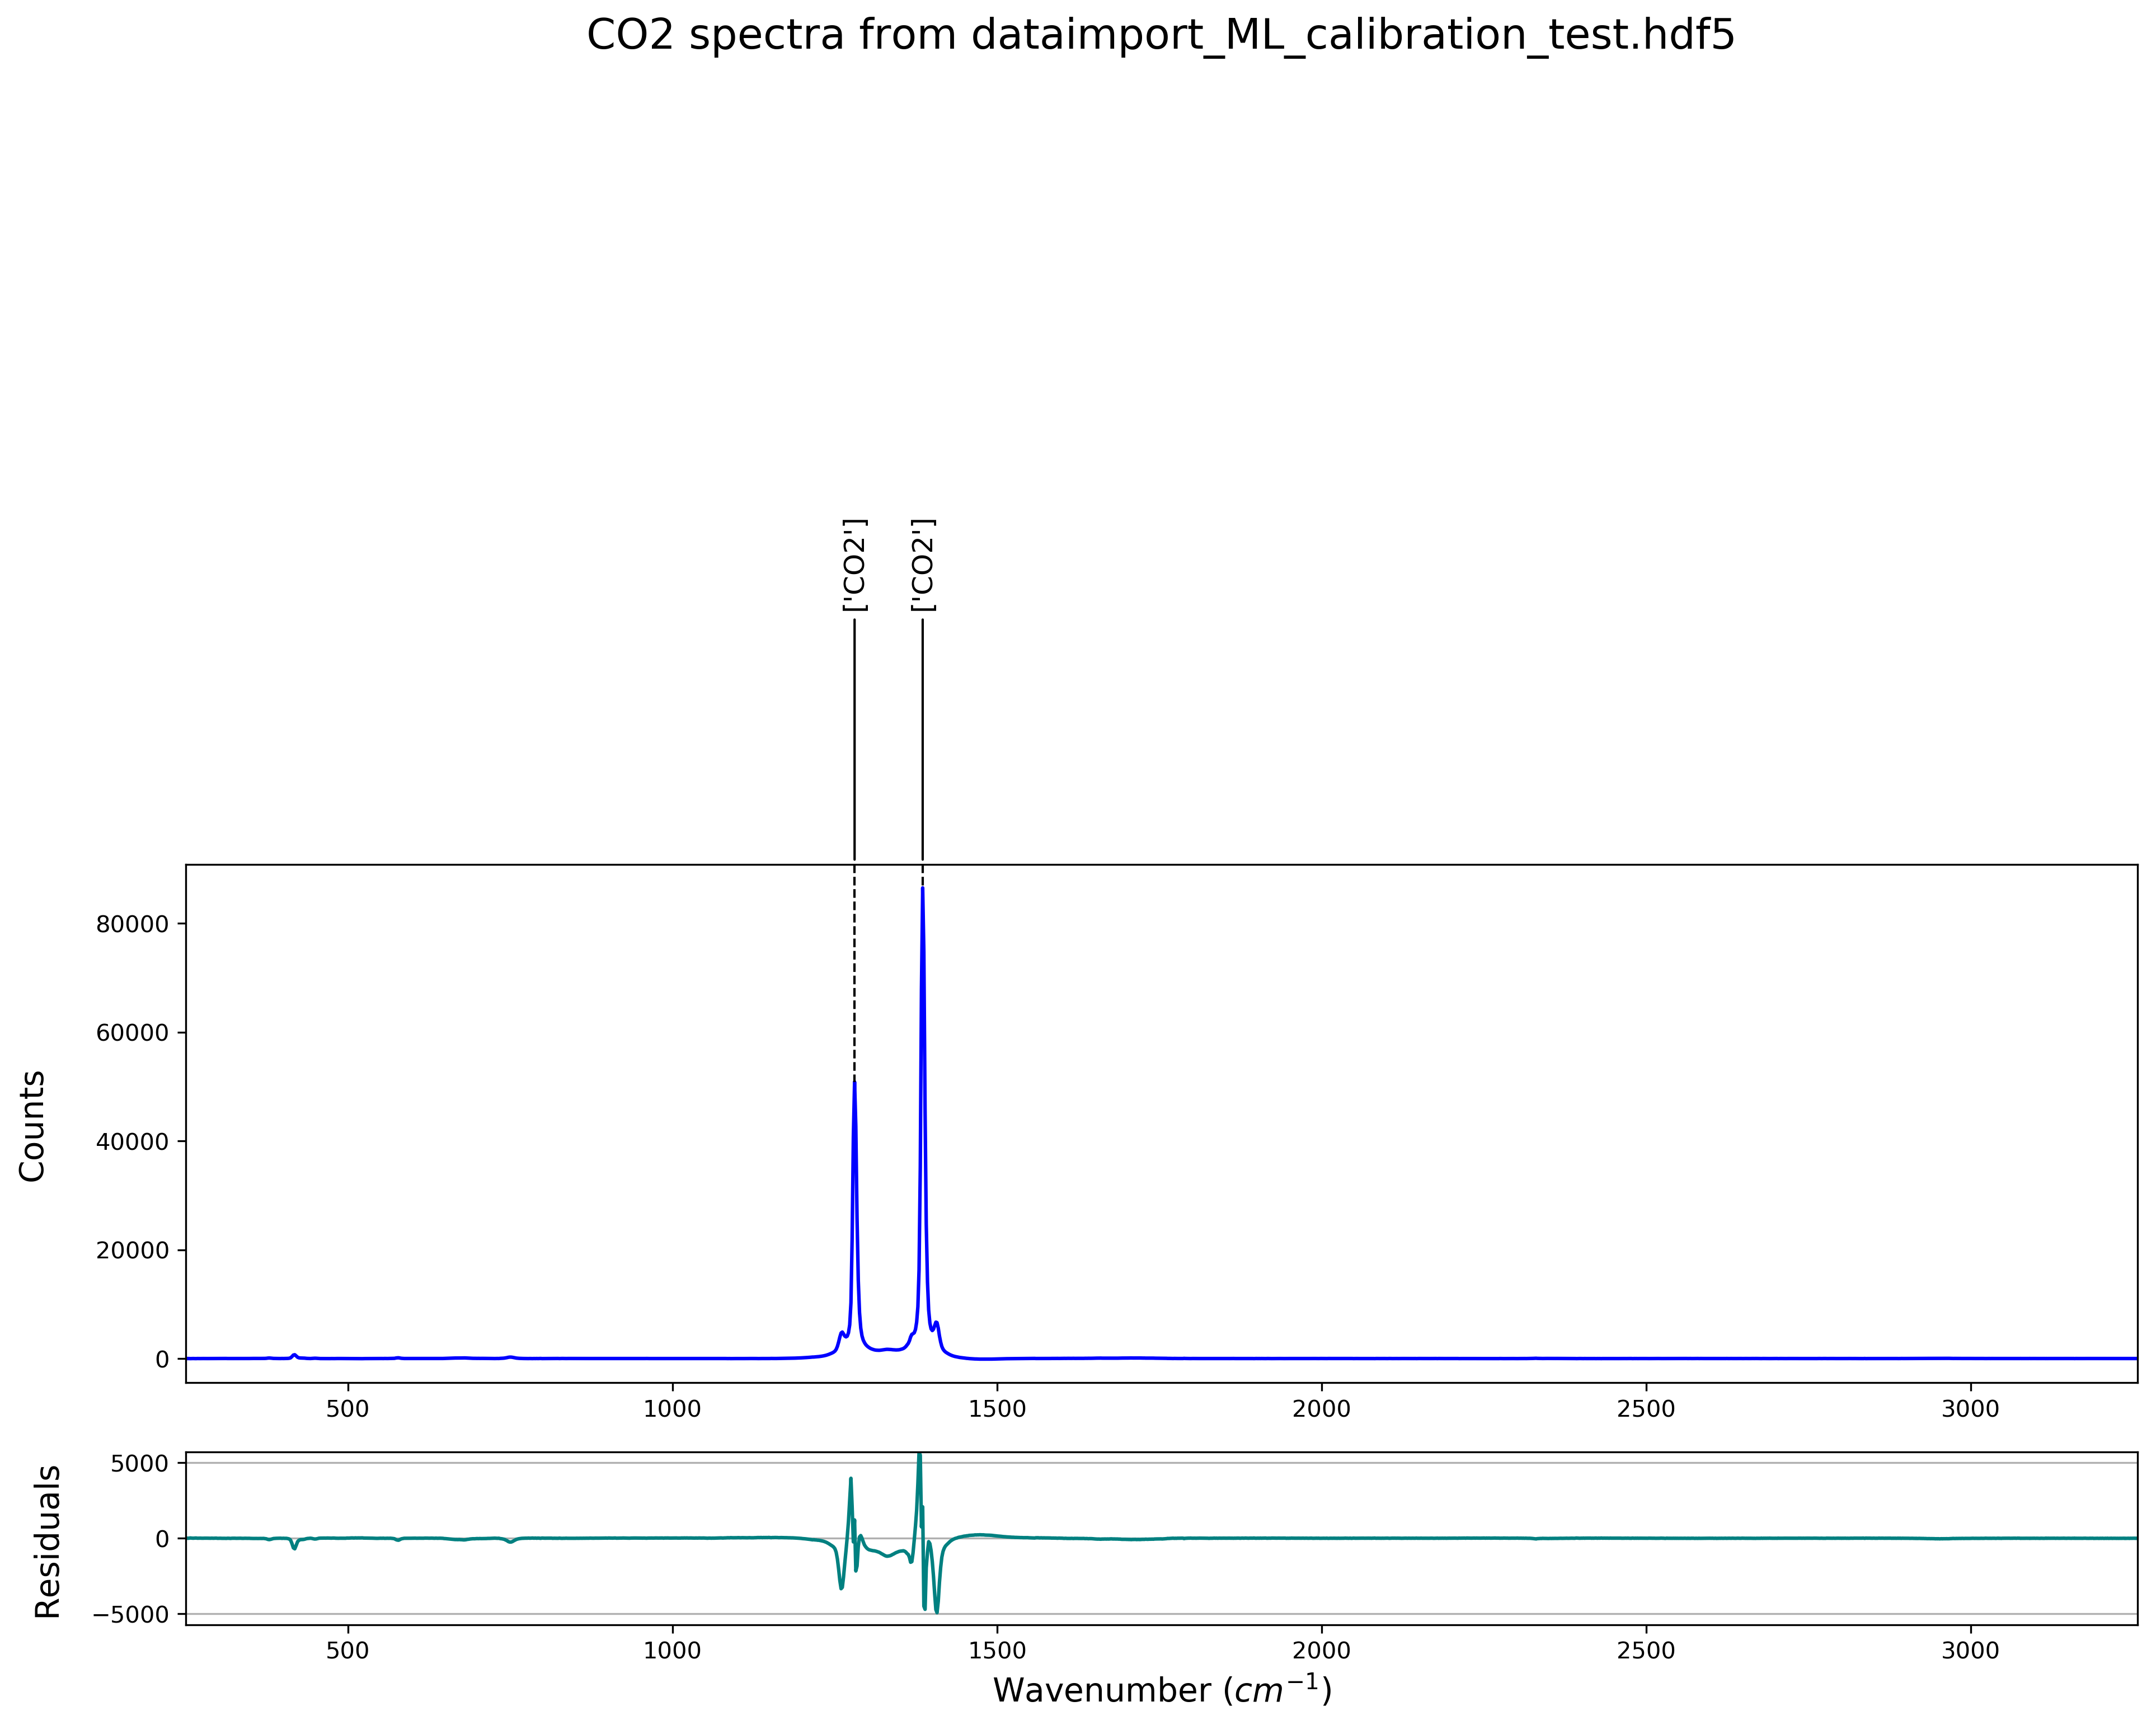

{'CO2': 100.0, 'CarbonMonoxide': 0.0, 'H2O': 0.0, 'Hydrogen': 0.0, 'sapphire': 0.0}
The peaks that we found for CO2 are: 
1280.4
1385.3
[0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[1.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0.]
[['CarbonMonoxide']]
(0.18946266201343182, 4.377799485947795, 2139.9096496496495, 746.4820298262704, 8.75559897189559, 75.20278461873698, 746.2314741512114, "['CarbonMonoxide']")
export labelling only
["['CarbonMonoxide']"]


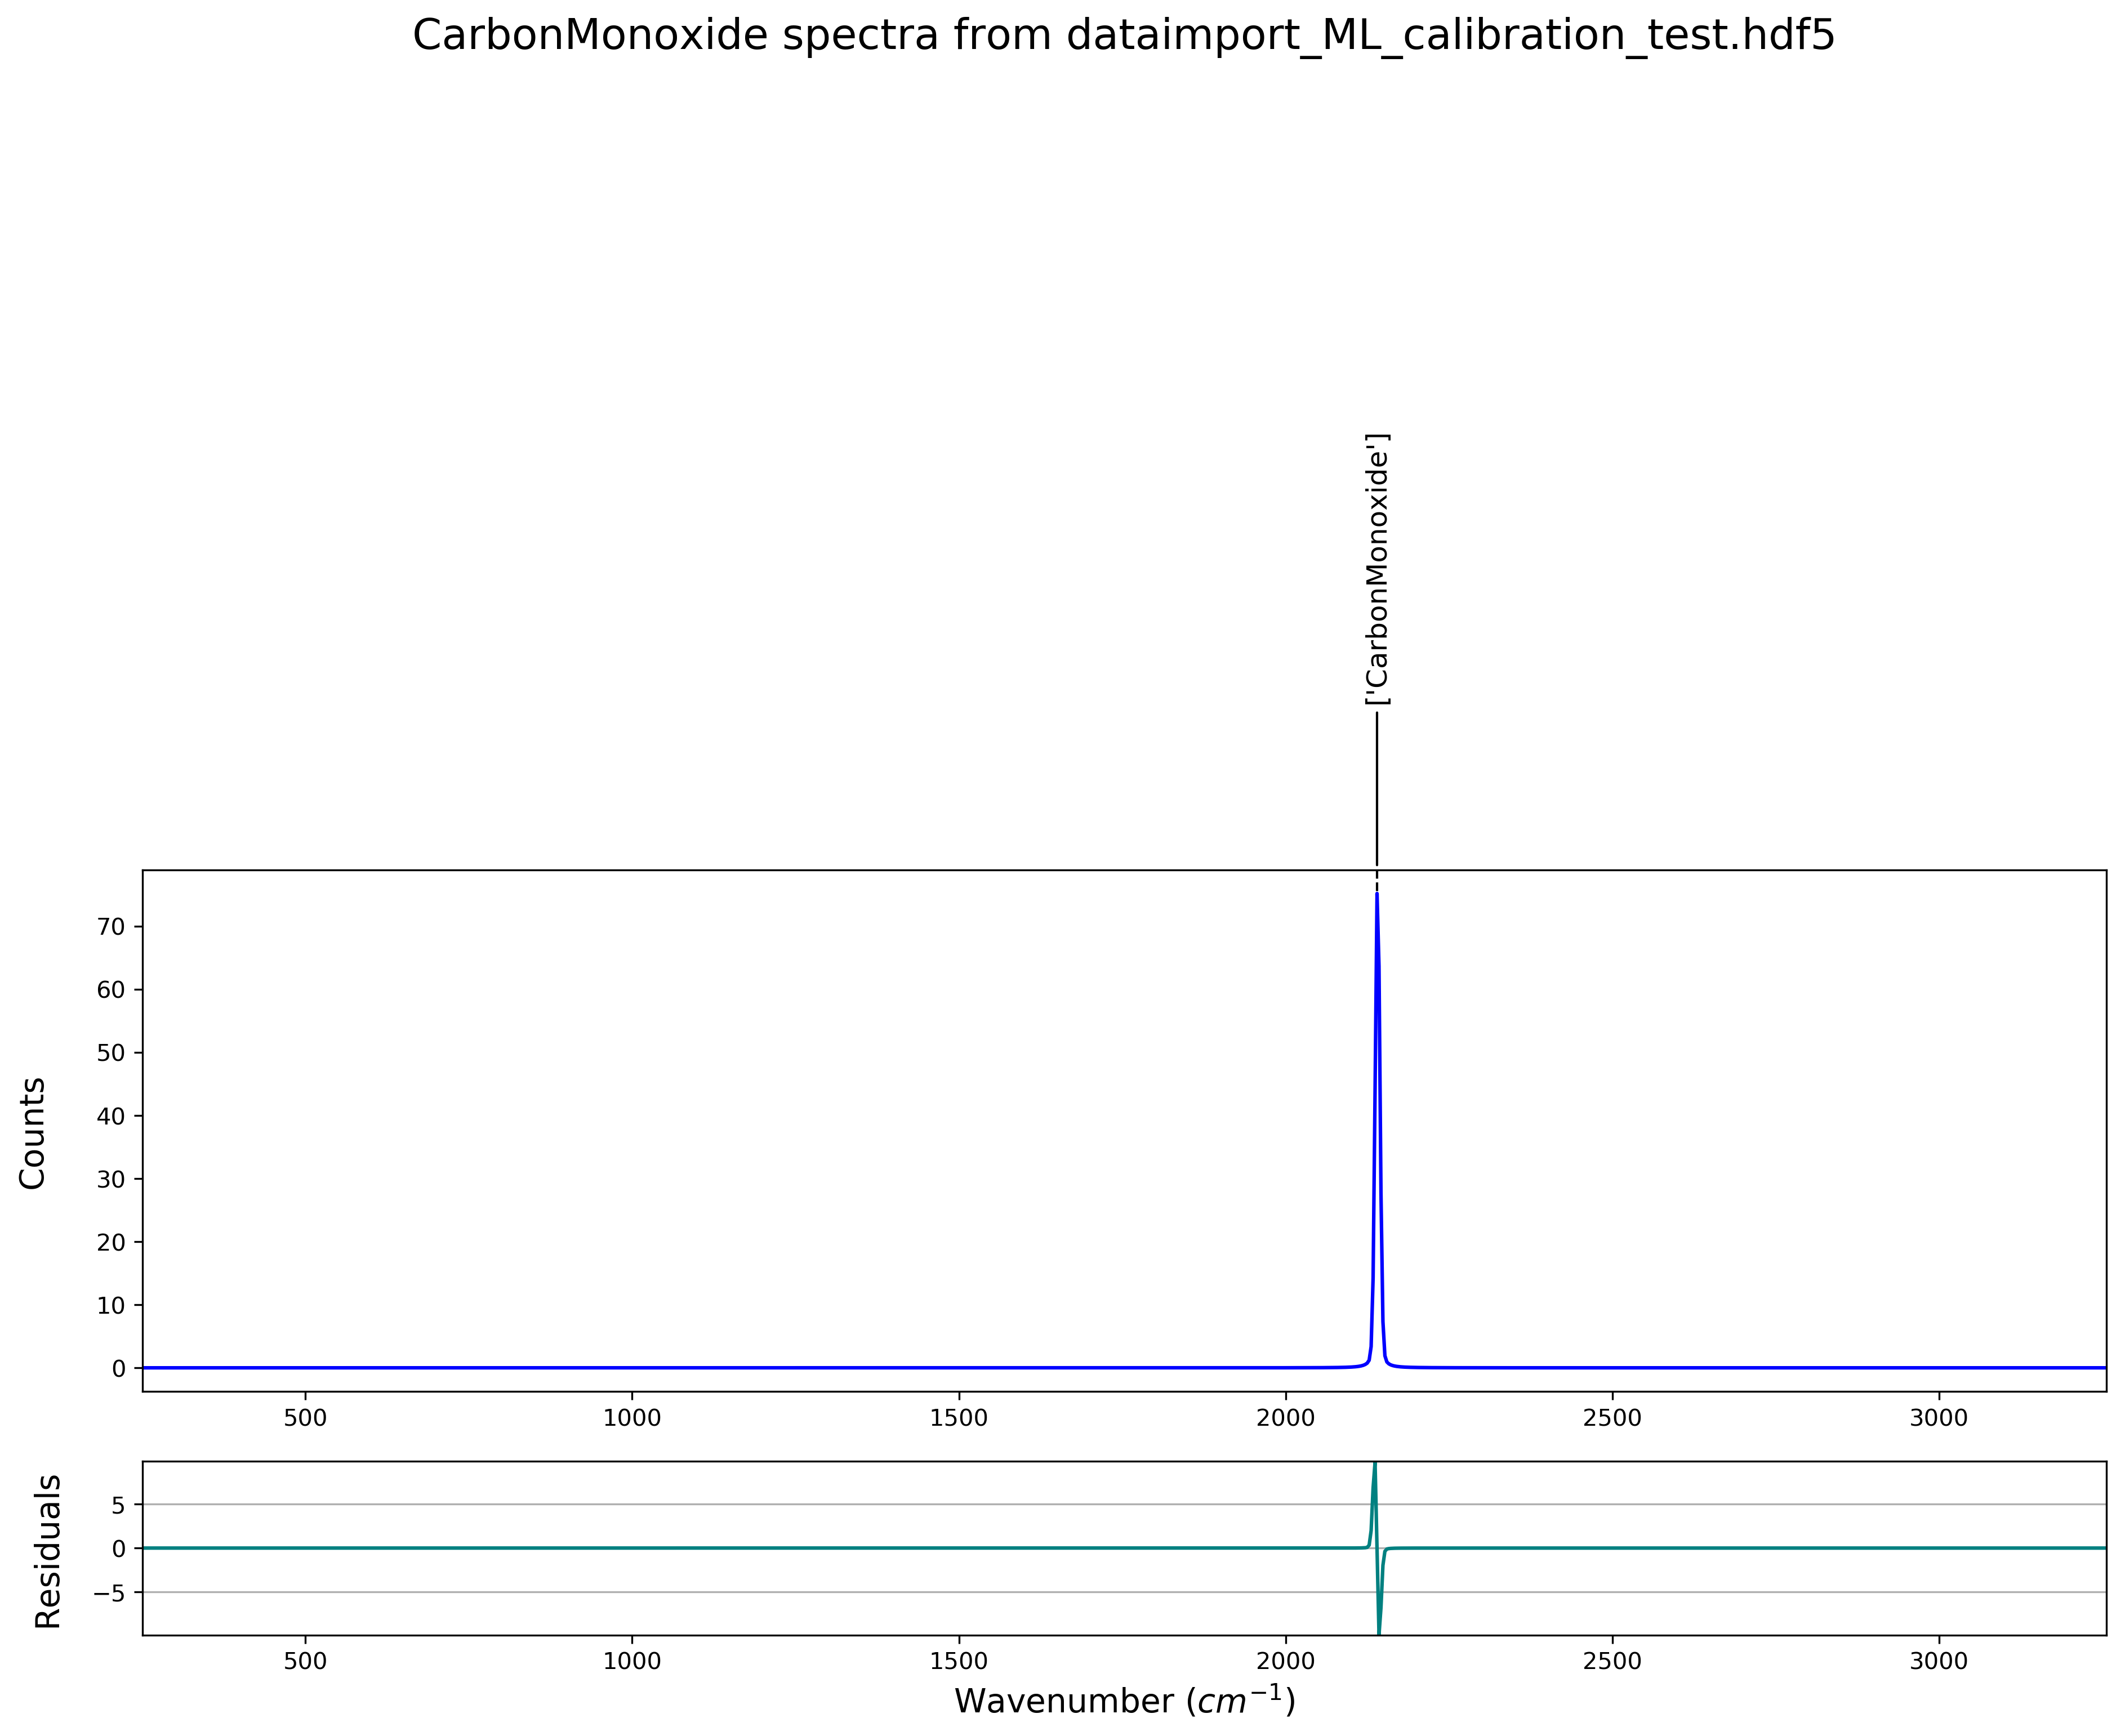

{'CO2': 0.0, 'CarbonMonoxide': 100.0, 'H2O': 0.0, 'Hydrogen': 0.0, 'sapphire': 0.0}
The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[1. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0.]
[['H2O'], ['H2O']]
(0.006215185793218669, 41.10712622137721, 1640.6, 33098.86638479188, 82.21425244275441, 377.45298115949686, 33095.26092326854, "['H2O']")
(0.5318756402658722, 99.63295804670345, 3194.4, 76195.52890814684, 199.2659160934069, 297.6363141929949, 54361.26750312135, "['H2O']")
export labelling only
["['H2O']", "['H2O']"]


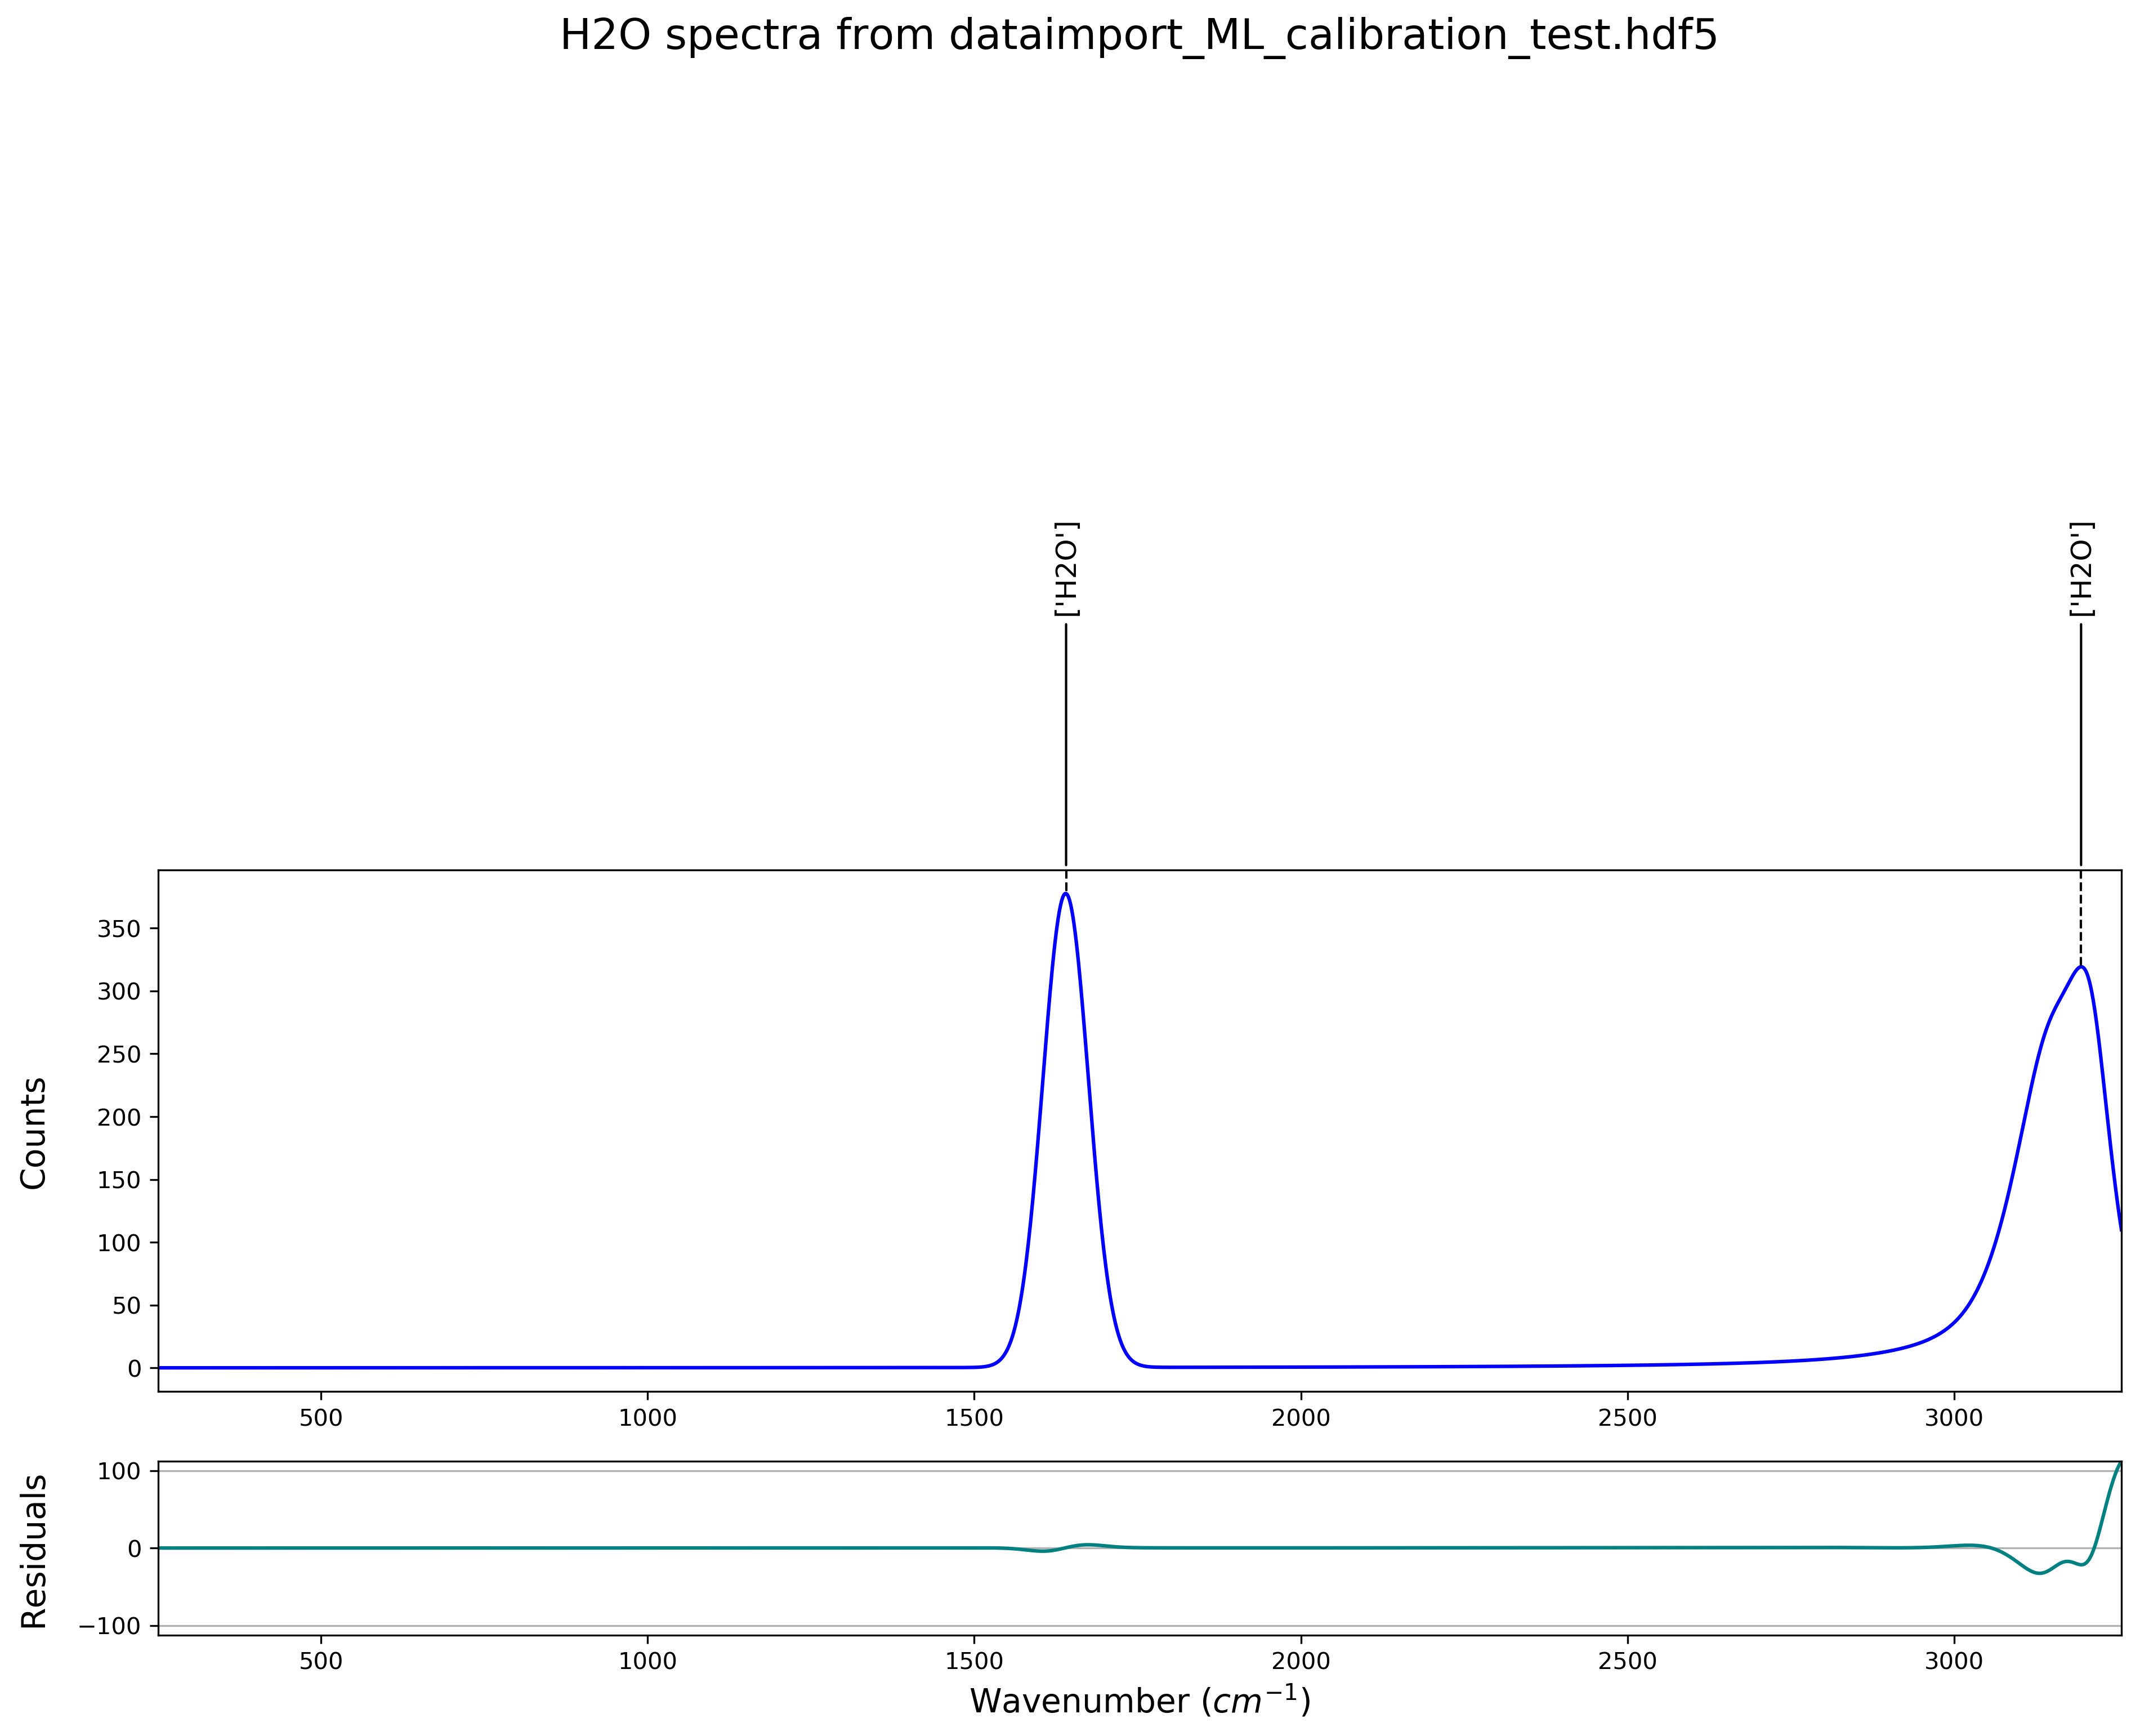

{'CO2': 0.0, 'CarbonMonoxide': 0.0, 'H2O': 100.0, 'Hydrogen': 0.0, 'sapphire': 0.0}
The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 1. 1.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0.]
[['Hydrogen'], ['Hydrogen'], ['Hydrogen'], ['Hydrogen']]
(0.6876412869997172, 4.526829240641191, 355.6504104104104, 8506.928314629067, 9.053658481282381, 687.051477478366, 8424.938502538342, "['Hydrogen']")
(0.5776514260139457, 4.404430553512797, 587.3333133133133, 21649.13835842132, 8.808861107025594, 1878.912150748617, 21593.078666430665, "['Hydrogen']")
(0.6592196662491634, 4.445398881516882, 816.0073473473473, 3734.007960827157, 8.890797763033763, 310.71131364604474, 3726.881017

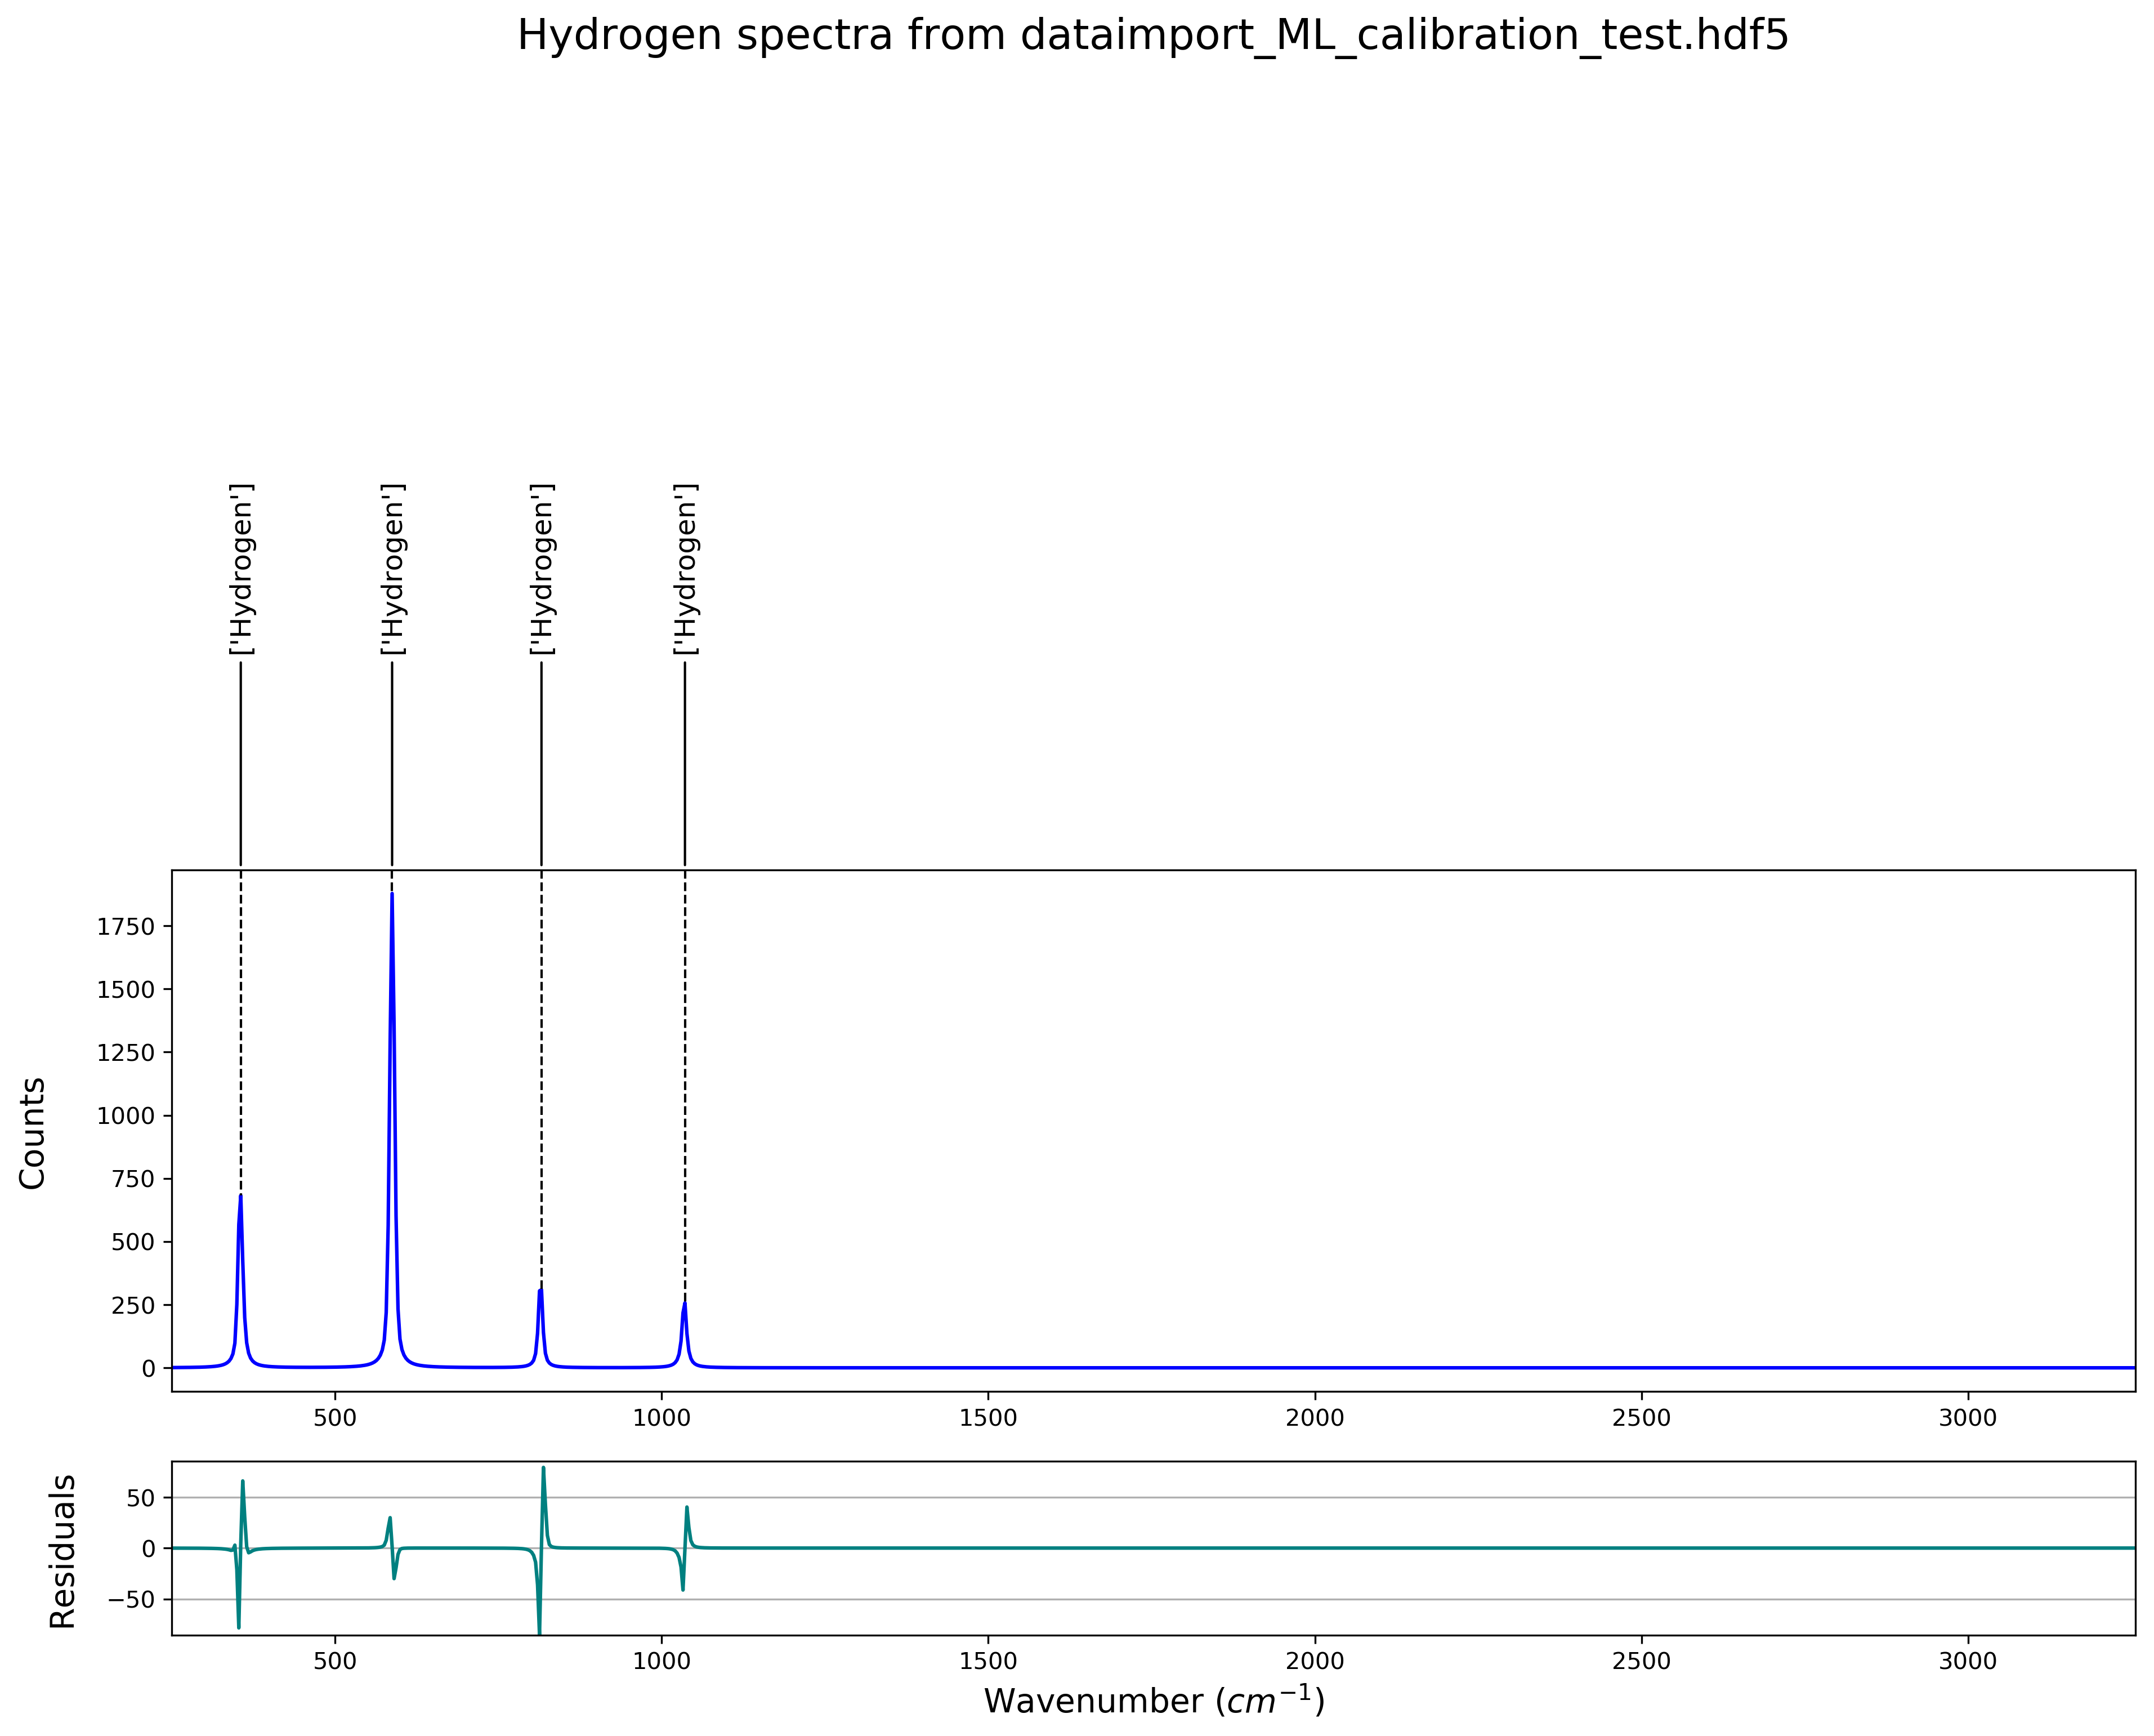

{'CO2': 0.0, 'CarbonMonoxide': 0.0, 'H2O': 0.0, 'Hydrogen': 100.0, 'sapphire': 0.0}
The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['sapphire']]
(7.865833902698238e-05, 3.946517215506262, 378.71, 792.3733362581123, 7.893034431012524, 94.3067186133851, 792.3934680653651, "['sapphire']")
(0.7161458256325994, 3.8053454074797863, 418.14, 7491.01484869759, 7.610690814959573, 711.2134852049659, 7450.195410588567, "['sapphire']")
(5.886445055958145e-05, 4.065034693521577, 575.97, 1001.4486623815584, 8.130069387043154, 115.71615325148969, 1001.4204167083747, "['sapphire']")
(2

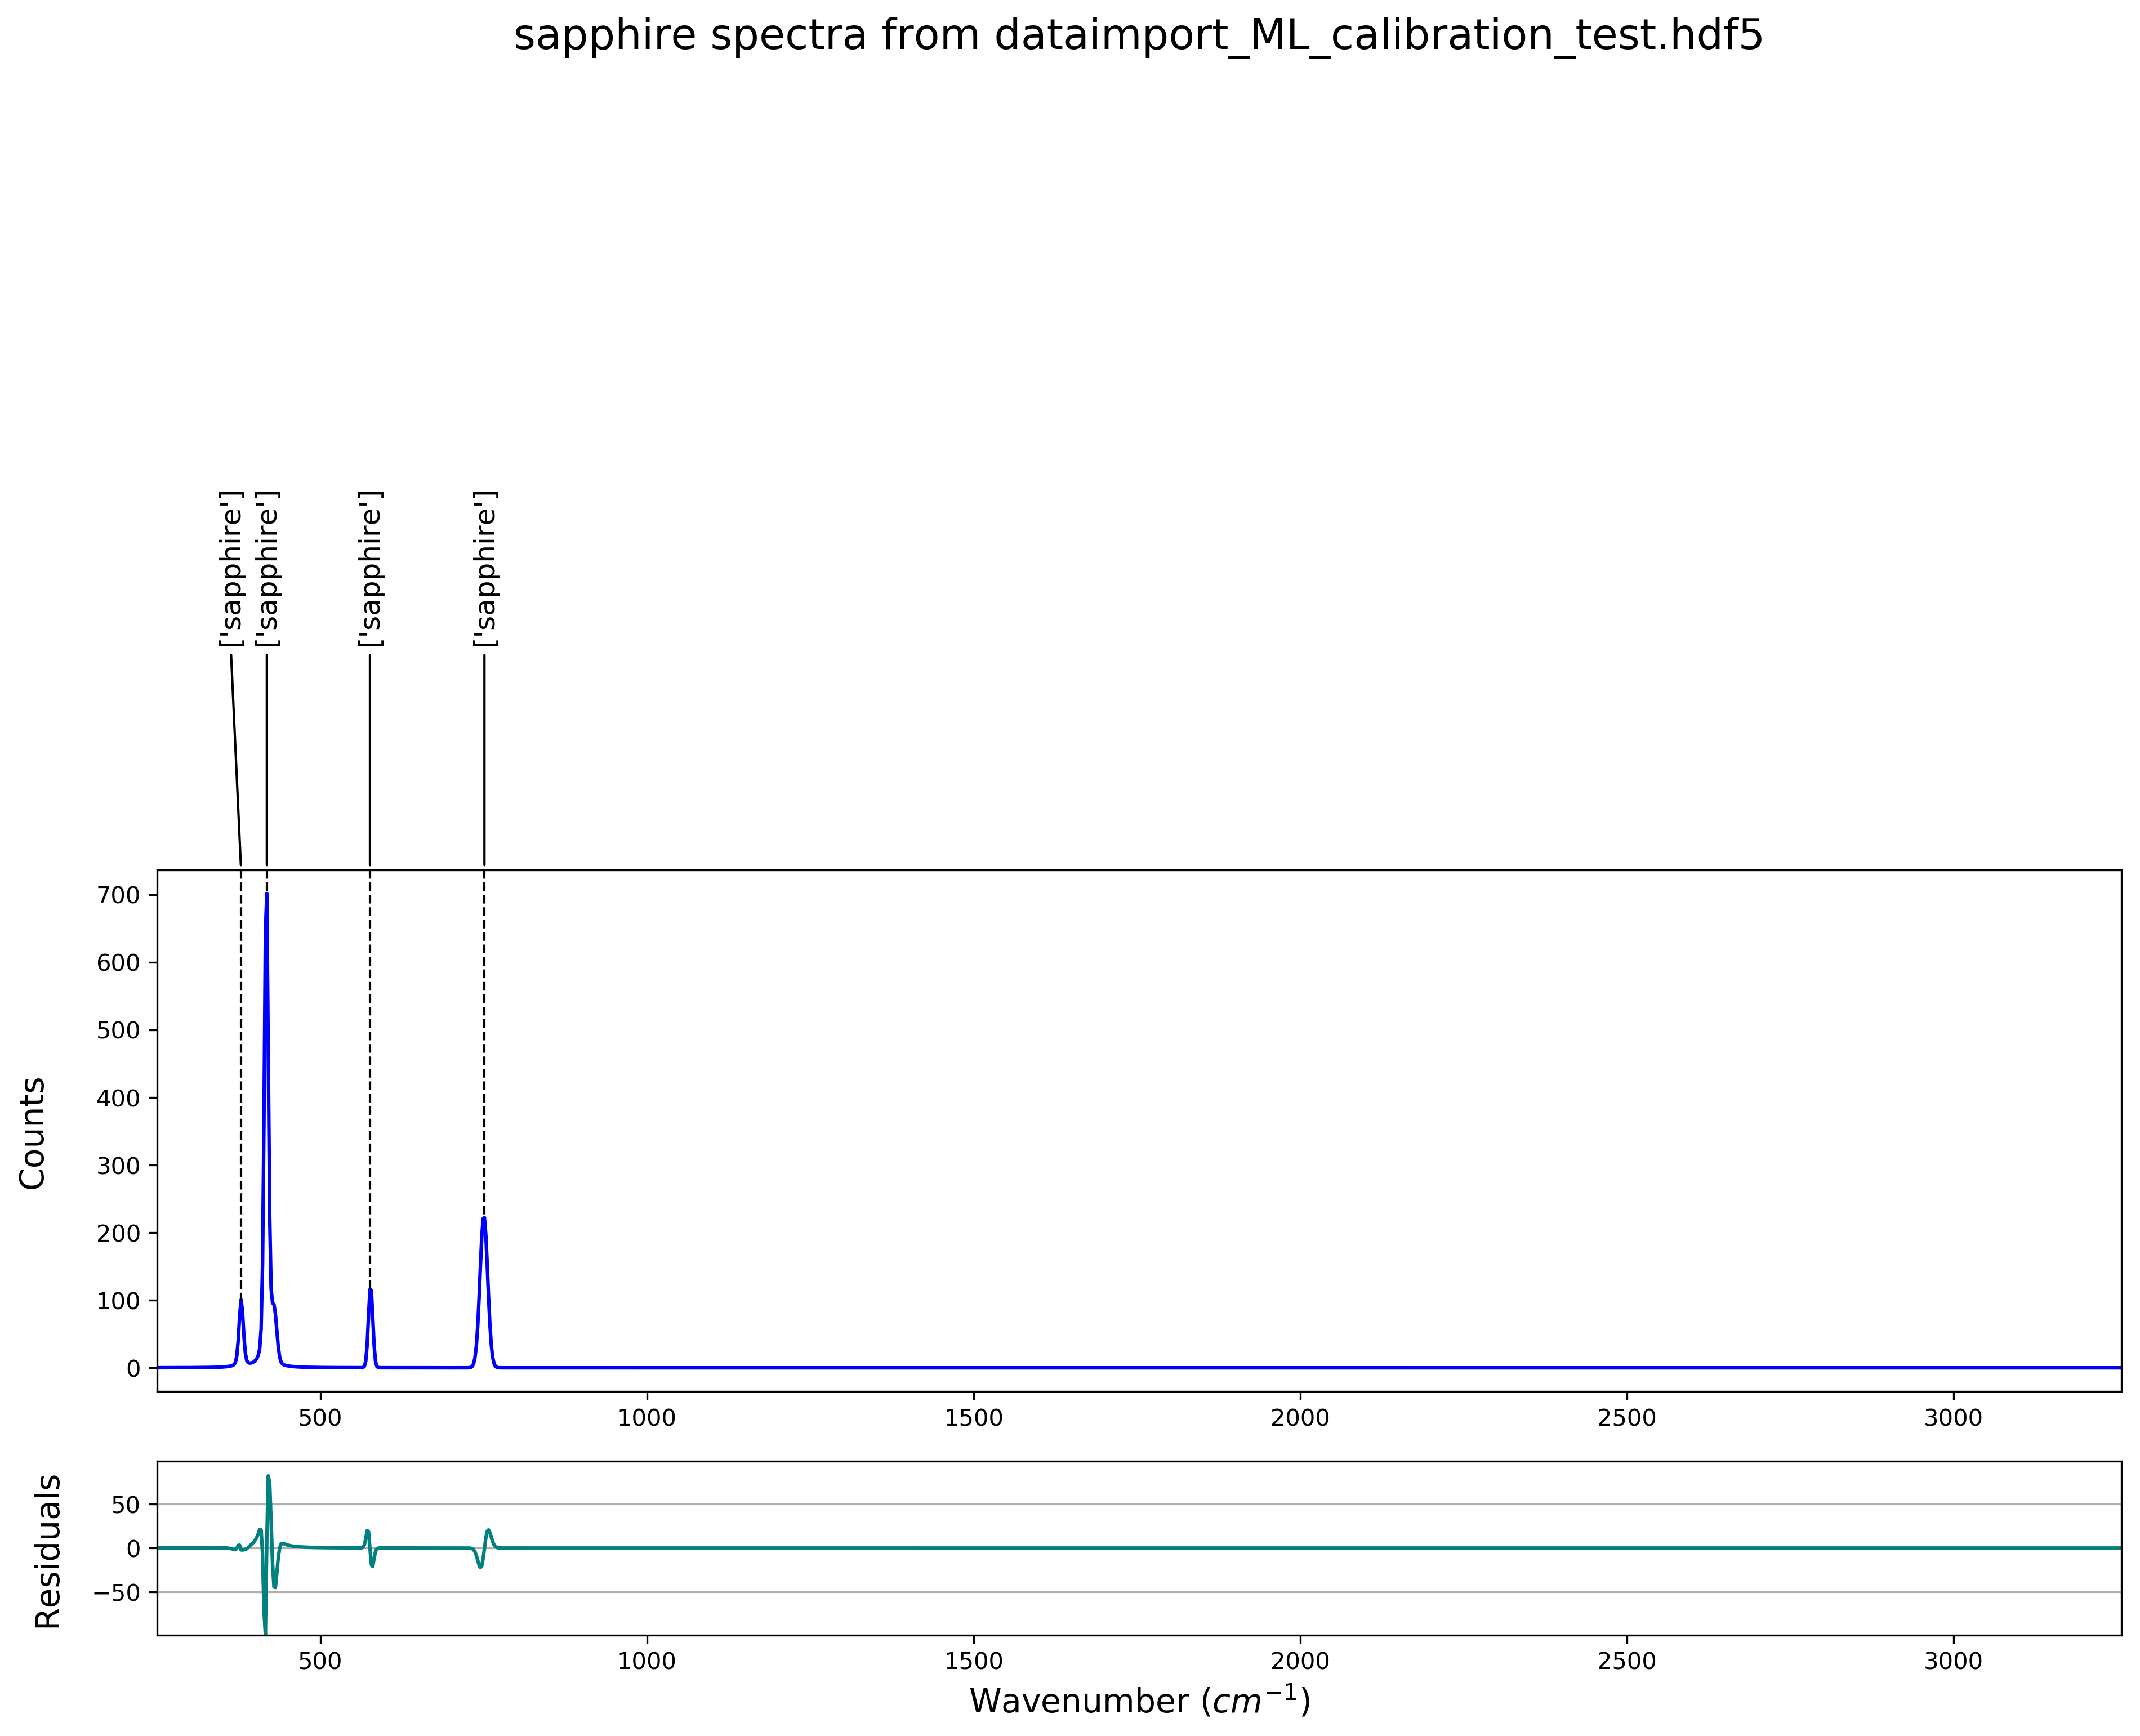

{'CO2': 0.0, 'CarbonMonoxide': 0.0, 'H2O': 0.0, 'Hydrogen': 0.0, 'sapphire': 100.0}


In [21]:
hdf5_calfilename = 'dataimport_ML_calibration_test.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'dataimport_ML_calibration_test.hdf5'

frames = [ peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10) for key in cal_key_list ]

In [22]:
frames

[          0        1       2       3        4        5       6        7
 0  0.931503  3.51779  1280.4  556439  7.03559  51990.2  555490  ['CO2']
 0  0.847449  3.42714  1385.3  888947  6.85428  88555.8  887808  ['CO2'],
           0       1        2        3       4        5        6  \
 0  0.189463  4.3778  2139.91  746.482  8.7556  75.2028  746.231   
 
                     7  
 0  ['CarbonMonoxide']  ,
             0        1       2        3        4        5        6        7
 0  0.00621519  41.1071  1640.6  33098.9  82.2143  377.453  33095.3  ['H2O']
 0    0.531876   99.633  3194.4  76195.5  199.266  297.636  54361.3  ['H2O'],
           0        1        2        3        4        5        6  \
 0  0.687641  4.52683   355.65  8506.93  9.05366  687.051  8424.94   
 0  0.577651  4.40443  587.333  21649.1  8.80886  1878.91  21593.1   
 0   0.65922   4.4454  816.007  3734.01   8.8908  310.711  3726.88   
 0  0.910257  4.39011  1035.65  3393.78  8.78023  256.574  3386.98   
 
       

In [23]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=dan, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

NameError: name 'dan' is not defined

In [ ]:
result

In [ ]:
datcal = pd.DataFrame()

In [ ]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
known_compound_list = ["['Hydrogen']", "['Hydrogen', 'sapphire']", "['sapphire']", "['Unassigned']", "['CO2']", "['H2O']", "['CarbonMonoxide']"]
#convert the categorical columns into numeric
encoded_value = le.fit_transform(known_compound_list)
print(encoded_value)

# df.apply(LabelEncoder().fit_transform)
# EDIT2:

# In scikit-learn 0.20, the recommended way is

# OneHotEncoder().fit_transform(df)
# as the OneHotEncoder now supports string input. Applying OneHotEncoder only to certain columns is possible with the ColumnTransformer.

# EDIT:

# Since this answer is over a year ago, and generated many upvotes (including a bounty), I should probably extend this further.

# For inverse_transform and transform, you have to do a little bit of hack.

# from collections import defaultdict
# d = defaultdict(LabelEncoder)
# With this, you now retain all columns LabelEncoder as dictionary.

# # Encoding the variable
# fit = df.apply(lambda x: d[x.name].fit_transform(x))

# # Inverse the encoded
# fit.apply(lambda x: d[x.name].inverse_transform(x))

# # Using the dictionary to label future data
# df.apply(lambda x: d[x.name].transform(x))


In [ ]:
datcal['fraction']= result[:][0]
datcal['sigma']= result[:][1]
# datcal['center']= result[:][2]
datcal['amplitude']= result[:][3]
datcal['fwhm']= result[:][4]
datcal['height']= result[:][5]
datcal['auc']= result[:][6]
datcal['labelencoded']=le.fit_transform(result[:][7])
datcal['labels']= result[:][7]
datcal['center']= result[:][2]

In [ ]:
datcal

In [ ]:
datcallabels = pd.DataFrame()

In [ ]:
datcallabels['labels']= result[:][7]

In [ ]:
datcallabels

In [ ]:
dat_train, dat_test = train_test_split(dat, test_size=0.05, random_state=1010)

In [ ]:
dat_test

In [ ]:
d_train=datcal

In [ ]:
d_train

In [ ]:
inputs=['fraction','sigma','center','amplitude','fwhm','height','auc']
X_train = d_train[inputs]
y_train = d_train['labels']
X_test = dat_test[inputs]
y_test = dat_test['labels']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline
# this is a new library you haven't seen before, what do you think it does? 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
KNNmodel = KNeighborsClassifier(n_neighbors=13) # initialize the model by choosing the number of neighbors (flexibility of model in this case)
# KNNmodel = KNeighborsClassifier(n_neighbors=1) minimum neighbord minimum predicted error
# remember the parabolic function of training vs. test set there is limit to the flexilibility vs. errors of the model
# Expected n_neighbors <= n_samples,  but n_samples = 15, n_neighbors = 20
# thus KNNmodel = KNeighborsClassifier(n_neighbors=15) is max

In [ ]:
KNNmodel.fit(X_train, y_train) # feed the model some training data 

In [ ]:
rate = KNNmodel.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = KNNmodel.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
colors = ['b', 'r', 'k','b', 'r', 'k','b', 'r', 'k']
shapes = ['s', '^', 'o','s', '^', 'o','s', '^', 'o']
#zip function is very useful to 
for typ, color, shape in zip(d_train.labels.unique(), colors, shapes): #iterating to scatter plot black blue and red dots through types colors and shapes 
    ax.scatter(d_train[d_train.labels==typ].height, d_train[d_train.labels==typ].auc, s=200, marker=shape, color=color)
    ax.scatter(dat_test[dat_test.labels==typ].height, dat_test[dat_test.labels==typ].auc, s=200, marker=r'$?$', color=color )
    
ax.set_xlim([0, 1000])
ax.set_ylim([0, 10000])
ax.set_xlabel('height')
ax.set_ylabel('auc')
ax.set_title('Training and Test data plotted')

In [ ]:
# additional library we will use 
from matplotlib.colors import ListedColormap

# just for convenience and similarity with sklearn tutorial
# I am going to assign our X and Y data to specific vectors
# this is not strictly needed and you could use elements df for the whole thing!
elements = d_train
X=elements[['height','center']]
print(X)
#this is a trick to turn our strings (type of element / class) into unique 
#numbers.  Play with this in a separate cell and make sure you know wth is 
#going on!
levels,labels=pd.factorize(elements.labels)
y=levels
print(levels)
#This determines levelspacing for our color map and the colors themselves
h=0.02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# in the sklearn tutorial two different weights are compared
# the decision between "uniform" and "distance" determines the probability
# weight.  "uniform" is the version presented in class, you can change to 
# distance
# weights='uniform'
weights='distance'

# I am actually refitting the KNN here. If you had a big data set you would
# not do this, but I want you to have the convenience of changing K or 
# weights here in this cell. Large training sets with many features can take 
# awhile for KNN training! 

K=5
clf = KNeighborsClassifier(n_neighbors=K, weights=weights)
clf.fit(X,y)

# Straight from the tutorial - quickly read and see if you know what these 
# things are going - if you are < 5 min until end then you should skip this part 

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = elements.height.min() - 0.1  , elements.height.max() + 0.1
y_min, y_max = elements.center.min() - 0.1  , elements.center.max() + 0.1  
print(y_min, y_max, h)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(4,4));
#plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light,vmin=0,vmax=np.max(y))
# Plot also the training points
# This may be the 1st time you have seen how to color points by a 3rd vector
# In this case y ( see c=y in below statement ). This is very useful! 
plt.scatter(X.height, X.center, c=y, cmap=cmap_bold)

# Set limits and lebels 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel('height')
plt.ylabel('center')

In [ ]:
inputs=['fraction','sigma','center','amplitude','fwhm','height','auc']
X=dat[inputs]
y = dat['labelencoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1010)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
KNNmodel = KNeighborsClassifier(n_neighbors=3) # initialize the model by choosing the number of neighbors (flexibility of model in this case)
# KNNmodel = KNeighborsClassifier(n_neighbors=1) minimum neighbord minimum predicted error
# remember the parabolic function of training vs. test set there is limit to the flexilibility vs. errors of the model
# Expected n_neighbors <= n_samples,  but n_samples = 15, n_neighbors = 20
# thus KNNmodel = KNeighborsClassifier(n_neighbors=15) is max

In [ ]:
KNNmodel.fit(X_train, y_train) # feed the model some training data 

In [ ]:
rate = KNNmodel.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = KNNmodel.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
colors = ['b', 'r', 'k','b', 'r', 'k','b', 'r', 'k']
shapes = ['s', '^', 'o','s', '^', 'o','s', '^', 'o']
#zip function is very useful to 
for typ, color, shape in zip(dat.labels.unique(), colors, shapes): #iterating to scatter plot black blue and red dots through types colors and shapes 
    ax.scatter(d_train[d_train.labelencoded==typ].height, d_train[d_train.labelencoded==typ].auc, s=200, marker=shape, color=color)
    ax.scatter(d_test[d_test.labelencoded==typ].height, d_test[d_test.labelencoded==typ].auc, s=200, marker=r'$?$', color=color )
    
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
ax.set_xlabel('height')
ax.set_ylabel('auc')
ax.set_title('Training and Test data plotted')

In [ ]:
# additional library we will use 
from matplotlib.colors import ListedColormap

# just for convenience and similarity with sklearn tutorial
# I am going to assign our X and Y data to specific vectors
# this is not strictly needed and you could use elements df for the whole thing!
elements = dat
X=elements[['height','auc']]
print(X)
#this is a trick to turn our strings (type of element / class) into unique 
#numbers.  Play with this in a separate cell and make sure you know wth is 
#going on!
levels,labels=pd.factorize(elements.labelencoded)
y=levels
print(levels)
#This determines levelspacing for our color map and the colors themselves
h=0.02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# in the sklearn tutorial two different weights are compared
# the decision between "uniform" and "distance" determines the probability
# weight.  "uniform" is the version presented in class, you can change to 
# distance
# weights='uniform'
weights='distance'

# I am actually refitting the KNN here. If you had a big data set you would
# not do this, but I want you to have the convenience of changing K or 
# weights here in this cell. Large training sets with many features can take 
# awhile for KNN training! 

K=5
clf = KNeighborsClassifier(n_neighbors=K, weights=weights)
clf.fit(X,y)

# Straight from the tutorial - quickly read and see if you know what these 
# things are going - if you are < 5 min until end then you should skip this part 

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = elements.height.min() - 0.1  , elements.height.max() + 0.1
y_min, y_max = elements.auc.min() - 0.1  , elements.auc.max() + 0.1  
print(y_min, y_max, h)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(4,4));
#plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light,vmin=0,vmax=np.max(y))
# Plot also the training points
# This may be the 1st time you have seen how to color points by a 3rd vector
# In this case y ( see c=y in below statement ). This is very useful! 
plt.scatter(X.height, X.auc, c=y, cmap=cmap_bold)

# Set limits and lebels 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('height')
plt.ylabel('auc')